# Machine Learning to find the city or region

In [19]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#acquiring the data
avacado_df=pd.read_csv("avacado.csv")

In [5]:
#analysing the data
print(avacado_df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [6]:
#previewing the data
avacado_df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1360,48,24-01-2016,0.90,58434.39,18003.36,4208.29,4714.06,31508.68,29874.81,1614.91,18.96,conventional,2016,Boise
390,39,29-03-2015,1.11,149631.24,1977.68,63600.68,3003.97,81048.91,75725.67,5299.20,24.04,conventional,2015,GrandRapids
245,40,22-03-2015,1.21,799946.53,29308.00,596341.85,83937.78,90358.90,87394.44,2925.41,39.05,conventional,2015,Chicago
1231,24,12-07-2015,1.01,5791508.96,2688406.31,1950436.22,133097.00,1019569.43,731843.74,286270.91,1454.78,conventional,2015,West
1062,50,11-01-2015,1.18,2433295.61,1667012.92,269027.02,21918.53,475337.14,260164.00,215173.14,0.00,conventional,2015,Southeast


In [7]:
#checking the structure of the dataset
avacado_df.shape

(1517, 14)

In [11]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in avacado_df.columns:
    avacado_df[col] = le_x.fit_transform(avacado_df[col])
avacado_df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
373,38,14,59,644,855,575,1237,711,797,422,456,0,0,12
252,5,75,52,288,576,202,1074,141,169,492,475,0,0,9
749,41,49,92,677,338,885,401,1031,1053,847,0,0,0,30
1025,9,84,34,1360,1420,1340,1438,1316,1310,1243,314,0,0,42
101,10,60,47,1143,644,1245,1235,1128,1138,638,0,0,0,2


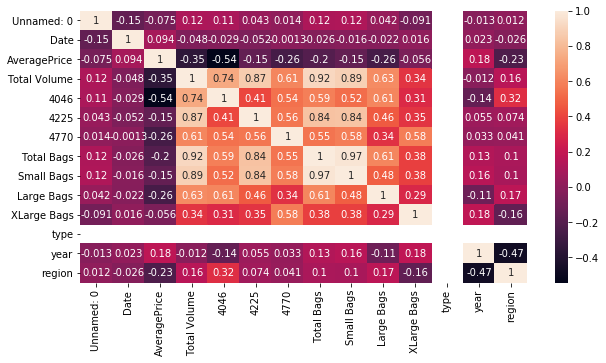

In [14]:
#checking for the correlation
corr_hmap=avacado_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_hmap,annot=True)

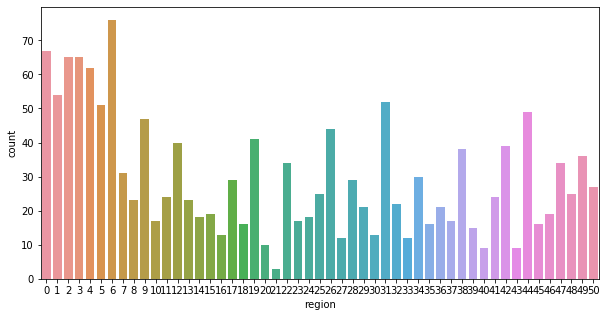

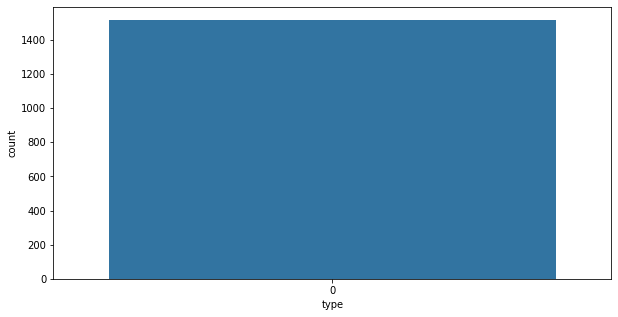

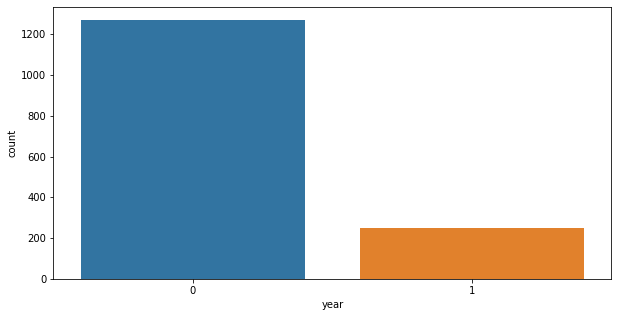

In [23]:
#printing different countplot
data_columns=['region','type','year']
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.countplot(data=avacado_df,x=data_columns[i])

Unnamed: 0         AxesSubplot(0.125,0.799681;0.168478x0.0803191)
Date            AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
AveragePrice    AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
Total Volume    AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
4046               AxesSubplot(0.125,0.703298;0.168478x0.0803191)
4225            AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
4770            AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
Total Bags      AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
Small Bags         AxesSubplot(0.125,0.606915;0.168478x0.0803191)
Large Bags      AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
XLarge Bags     AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
type            AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
year               AxesSubplot(0.125,0.510532;0.168478x0.0803191)
region          AxesSubplot(0.327174,0.510532;0.168478x0.0803191)
dtype: object

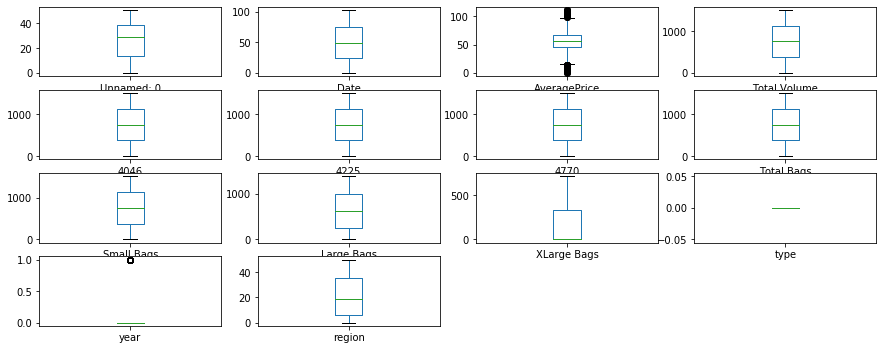

In [29]:
#checking for the outliers
avacado_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(15,12))

In [31]:
#checking the skewness before removing the outliers
avacado_df.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.120069
Total Volume    0.000000
4046            0.000000
4225            0.000000
4770            0.000674
Total Bags      0.000000
Small Bags      0.000000
Large Bags      0.066667
XLarge Bags     1.024596
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [32]:
#removing outliers
z_score=np.abs(zscore(avacado_df))
print(avacado_df.shape)
avacado_df_final=avacado_df.loc[(z_score<3).all(axis=1)]
print(avacado_df_final.shape)

(1517, 14)
(0, 14)


In [37]:
avacado_df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
482,41,49,69,352,274,689,675,436,313,883,386,0,0,18
136,22,88,55,89,578,24,666,15,17,129,0,0,0,3
1386,30,97,56,984,315,1126,1273,1082,1113,118,485,0,1,4
489,48,82,54,390,228,740,349,387,275,853,170,0,0,18
1490,40,65,39,1460,1362,1460,1460,1480,1481,1301,646,0,1,6


In [38]:
#Now separating input and output variable
x=avacado_df.drop(['region'],axis=1)
y=avacado_df['region']
print(x.shape)
print(y.shape)

(1517, 13)
(1517,)


In [39]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.81868039,  1.37776563,  1.35865419, ..., -0.73918466,
         0.        , -0.44100815],
       [-1.75131034,  0.57857991,  1.46518364, ..., -0.73918466,
         0.        , -0.44100815],
       [-1.6839403 , -0.22060582, -0.77193468, ..., -0.73918466,
         0.        , -0.44100815],
       ...,
       [-1.01023983, -1.51928262,  2.15762502, ...,  0.97839907,
         0.        ,  2.26753179],
       [-0.94286978,  1.07807099,  2.1043603 , ..., -0.73918466,
         0.        ,  2.26753179],
       [-0.87549974,  0.27888526,  1.89130141, ..., -0.73918466,
         0.        ,  2.26753179]])

In [40]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [43]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.9144736842105263
random state:  43  accuracy score:  0.9539473684210527
random state:  44  accuracy score:  0.9473684210526315
random state:  45  accuracy score:  0.9473684210526315
random state:  46  accuracy score:  0.9736842105263158
random state:  47  accuracy score:  0.9736842105263158
random state:  48  accuracy score:  0.9671052631578947
random state:  49  accuracy score:  0.9473684210526315
random state:  50  accuracy score:  0.9407894736842105
random state:  51  accuracy score:  0.9671052631578947
random state:  52  accuracy score:  0.9407894736842105
random state:  53  accuracy score:  0.9539473684210527
random state:  54  accuracy score:  0.9342105263157895
random state:  55  accuracy score:  0.9802631578947368
random state:  56  accuracy score:  0.9802631578947368
random state:  57  accuracy score:  0.9342105263157895
random state:  58  accuracy score:  0.9671052631578947
random state:  59  accuracy score:  0.9605263157894737
random 

random state:  42  accuracy score:  0.9407894736842105
random state:  43  accuracy score:  0.9473684210526315
random state:  44  accuracy score:  0.9736842105263158
random state:  45  accuracy score:  0.9407894736842105
random state:  46  accuracy score:  0.9802631578947368
random state:  47  accuracy score:  0.9671052631578947
random state:  48  accuracy score:  0.9671052631578947
random state:  49  accuracy score:  0.9736842105263158
random state:  50  accuracy score:  0.9671052631578947
random state:  51  accuracy score:  0.9473684210526315
random state:  52  accuracy score:  0.9407894736842105
random state:  53  accuracy score:  0.9605263157894737
random state:  54  accuracy score:  0.9407894736842105
random state:  55  accuracy score:  0.9539473684210527
random state:  56  accuracy score:  0.9539473684210527
random state:  57  accuracy score:  0.9473684210526315
random state:  58  accuracy score:  0.9605263157894737
random state:  59  accuracy score:  0.9671052631578947
random sta

In [45]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.9516483516483516
Cross Validation Score(Std):  0.004271759629923327

Model name:  KNN
Cross Validation Score(Mean):  0.9018315018315018
Cross Validation Score(Std):  0.01454170933427047

Model name:  DT
Cross Validation Score(Mean):  0.887912087912088
Cross Validation Score(Std):  0.016479445976852764

Model name:  GNB
Cross Validation Score(Mean):  0.8974358974358975
Cross Validation Score(Std):  0.01867772715601754

Model name:  SVC
Cross Validation Score(Mean):  0.9311355311355312
Cross Validation Score(Std):  0.012981718056168016



In [48]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",99.342105,95.164835
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",97.368421,90.183150
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",95.394737,88.791209
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",94.736842,89.743590
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",99.342105,93.113553


In [51]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70,test_size=0.10)
model_name=LogisticRegression()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.993421052631579
confusion matrix: 
[[8 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         3
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00  

In [52]:
#saving the model as pickle in a file
pickle.dump(model_name,open('LR_avacado_data.pkl','wb'))

In [53]:
#loading the model for testing
loaded_model=pickle.load(open('LR_avacado_data.pkl','rb'))
loaded_model.predict(x_test)

array([22,  6, 33, 27,  4, 24, 10, 50, 13,  5, 34, 49, 47, 19,  8, 47, 25,
       26, 35,  4,  3,  9, 26,  0, 27, 49, 20, 19,  6, 26, 44, 16, 46, 38,
       11,  4, 20, 45,  0, 42, 16, 39, 24, 26,  0, 44, 47, 47, 23, 22, 42,
       19, 38, 38, 28, 17,  7, 31, 48, 44, 28,  4, 26, 36, 47, 42,  0, 28,
       38,  6, 48,  7, 25, 26, 20,  5,  9, 41, 15,  0,  6,  0,  6,  1, 49,
       19, 49, 22, 48,  9,  3,  6, 45, 12, 50, 41,  1, 30, 40, 11,  9, 31,
       13, 41, 15, 44,  6,  1, 42, 32, 47, 13,  3,  7,  0, 31, 17, 10,  0,
       22, 41, 37, 26, 18, 44,  6,  1,  3, 50,  2,  9,  7,  3, 10, 19, 28,
        2, 29,  6,  2,  2, 34, 49, 22, 19,  5, 47, 48, 11,  9,  5, 19],
      dtype=int64)